In [1]:
# Libraries to help with reading, vizualizing and manipulating data
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.ticker as ticker
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_excel("P24_Listing_Data.xlsx")

In [3]:
#View head and tail of data
df

,MandateId,GroupId,ListDate,SuburbId,SuburbName,CityId,CityName,ProvinceId,ProvinceName,Bedrooms,Bathrooms,Latitude,Longitude,PropertyType,ErfSize,HouseSize,NumberOfParkingSpaces,ListPrice
0,37216405,1537263.000,2024-07-10 17:45:48.841,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,3.000,NaN,NaN,House,700.000,186.000,1.000,1490000.000
1,37219330,1537263.000,2024-07-11 12:10:14.956,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,1.000,NaN,NaN,House,700.000,186.000,2.000,1490000.000
2,37226548,1537263.000,2024-07-12 15:47:17.437,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,2.000,-25.703,28.199,House,499.000,186.000,2.000,1490000.000
3,37255718,1537263.000,2024-07-19 10:35:54.954,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,2.000,-25.703,28.199,House,NaN,186.000,1.000,1490000.000
4,37299097,1537266.000,2024-07-30 11:06:53.395,4253,Edenburg,109,Sandton,1,Gauteng,2.000,2.000,NaN,NaN,Apartment / Flat,0.000,80.000,2.000,1370000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986374,36000287,NaN,2023-09-28 14:19:03.682,10502,De Zalze Winelands Golf Estate,459,Stellenbosch,9,Western Cape,4.000,5.000,NaN,NaN,House,NaN,NaN,NaN,7250000.000
986375,35857530,NaN,2023-08-25 23:31:28.841,4258,Morningside,109,Sandton,1,Gauteng,0.000,0.000,NaN,NaN,House,NaN,NaN,NaN,2245125.000
986376,37207711,NaN,2024-07-10 09:53:53.553,4258,Morningside,109,Sandton,1,Gauteng,3.000,3.500,-26.063,28.055,House,264.000,0.000,0.000,3950000.000
986377,36783120,NaN,2024-04-01 22:51:51.558,1700,Hazelpark,13,Germiston,1,Gauteng,3.000,1.000,NaN,NaN,House,1425.000,0.000,3.000,1500000.000


In [4]:
#The shape and size of the data
print("The shape of the data is:", df.shape)
print("The size of the data is:", df.size)

The shape of the data is: (986379, 18)
The size of the data is: 17754822


## **Data Cleaning**

In [6]:
#Removing unwanted columns
df = df.drop(['GroupId', 'Latitude', 'Longitude', 'MandateId'], axis=1)

In [7]:
df = pd.DataFrame(df)

# Function to replace negative and decimal numbers with NaN and then drop them
def remove_negatives_and_decimals(x):
    if isinstance(x, (int, float)):
        if x < 0 or not x.is_integer():
            return np.nan
        return int(x)  # Convert float to int
    return x

# Apply the function to the entire DataFrame
df = df.map(remove_negatives_and_decimals)
df

,ListDate,SuburbId,SuburbName,CityId,CityName,ProvinceId,ProvinceName,Bedrooms,Bathrooms,PropertyType,ErfSize,HouseSize,NumberOfParkingSpaces,ListPrice
0,2024-07-10 17:45:48.841,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,3.000,House,700.000,186.000,1.000,1490000.000
1,2024-07-11 12:10:14.956,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,1.000,House,700.000,186.000,2.000,1490000.000
2,2024-07-12 15:47:17.437,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,2.000,House,499.000,186.000,2.000,1490000.000
3,2024-07-19 10:35:54.954,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,2.000,House,NaN,186.000,1.000,1490000.000
4,2024-07-30 11:06:53.395,4253,Edenburg,109,Sandton,1,Gauteng,2.000,2.000,Apartment / Flat,0.000,80.000,2.000,1370000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986374,2023-09-28 14:19:03.682,10502,De Zalze Winelands Golf Estate,459,Stellenbosch,9,Western Cape,4.000,5.000,House,NaN,NaN,NaN,7250000.000
986375,2023-08-25 23:31:28.841,4258,Morningside,109,Sandton,1,Gauteng,0.000,0.000,House,NaN,NaN,NaN,2245125.000
986376,2024-07-10 09:53:53.553,4258,Morningside,109,Sandton,1,Gauteng,3.000,NaN,House,264.000,0.000,0.000,3950000.000
986377,2024-04-01 22:51:51.558,1700,Hazelpark,13,Germiston,1,Gauteng,3.000,1.000,House,1425.000,0.000,3.000,1500000.000


In [8]:
#Checking missing variables
df.isnull().sum()

ListDate                      0
SuburbId                      0
SuburbName                    0
CityId                        0
CityName                      0
ProvinceId                    0
ProvinceName                  0
Bedrooms                  16126
Bathrooms                115202
PropertyType                  0
ErfSize                  240327
HouseSize                339392
NumberOfParkingSpaces    231762
ListPrice                   338
dtype: int64

In [9]:
#Dropping null values
df = df.dropna()

In [10]:
df

,ListDate,SuburbId,SuburbName,CityId,CityName,ProvinceId,ProvinceName,Bedrooms,Bathrooms,PropertyType,ErfSize,HouseSize,NumberOfParkingSpaces,ListPrice
0,2024-07-10 17:45:48.841,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,3.000,House,700.000,186.000,1.000,1490000.000
1,2024-07-11 12:10:14.956,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,1.000,House,700.000,186.000,2.000,1490000.000
2,2024-07-12 15:47:17.437,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,2.000,House,499.000,186.000,2.000,1490000.000
4,2024-07-30 11:06:53.395,4253,Edenburg,109,Sandton,1,Gauteng,2.000,2.000,Apartment / Flat,0.000,80.000,2.000,1370000.000
5,2023-09-28 16:47:32.436,5825,Dunkeld West,100,Johannesburg,1,Gauteng,0.000,0.000,Commercial Property,2682.000,0.000,0.000,15000000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986369,2022-10-07 14:24:05.279,1683,Denlee,13,Germiston,1,Gauteng,3.000,2.000,Townhouse,0.000,0.000,1.000,1150000.000
986370,2024-04-05 22:38:17.724,3903,Douglasdale,109,Sandton,1,Gauteng,2.000,1.000,Apartment / Flat,0.000,80.000,1.000,1050000.000
986372,2024-04-20 22:32:51.451,1700,Hazelpark,13,Germiston,1,Gauteng,3.000,1.000,House,1425.000,0.000,3.000,1500000.000
986377,2024-04-01 22:51:51.558,1700,Hazelpark,13,Germiston,1,Gauteng,3.000,1.000,House,1425.000,0.000,3.000,1500000.000


In [11]:
#Checking missing variables
df.isnull().sum()

ListDate                 0
SuburbId                 0
SuburbName               0
CityId                   0
CityName                 0
ProvinceId               0
ProvinceName             0
Bedrooms                 0
Bathrooms                0
PropertyType             0
ErfSize                  0
HouseSize                0
NumberOfParkingSpaces    0
ListPrice                0
dtype: int64

In [12]:
#Filtering number of bathrooms and bedrooms to be between 0 to 10
df = df[(df['Bathrooms'] >= 0) & (df['Bathrooms'] <= 10)]
df = df[(df['Bedrooms'] >= 0) & (df['Bedrooms'] <= 10)]

In [13]:
#Removing all list price that are less than 100000
df = df[df["ListPrice"] >=100000]

In [14]:
# Outlier Detection and Removal
# Use z-score to detect and remove outliers for numerical columns
# Define a function to remove outliers using Z-score method
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df[columns]))
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers for 'HouseSize', 'ErfSize', and 'ListPrice'
df = remove_outliers_zscore(df, ['HouseSize', 'ErfSize', 'ListPrice'])

In [15]:
#Removing outliers in price
lower_bound = df['ListPrice'].quantile(0.01)
upper_bound = df['ListPrice'].quantile(0.99)
df = df[(df['ListPrice'] >= lower_bound) & (df['ListPrice'] <= upper_bound)]

In [16]:
#Viewing head and tail of the cleaned data
df

,ListDate,SuburbId,SuburbName,CityId,CityName,ProvinceId,ProvinceName,Bedrooms,Bathrooms,PropertyType,ErfSize,HouseSize,NumberOfParkingSpaces,ListPrice
0,2024-07-10 17:45:48.841,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,3.000,House,700.000,186.000,1.000,1490000.000
1,2024-07-11 12:10:14.956,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,1.000,House,700.000,186.000,2.000,1490000.000
2,2024-07-12 15:47:17.437,327,Wonderboom South,1,Pretoria,1,Gauteng,3.000,2.000,House,499.000,186.000,2.000,1490000.000
4,2024-07-30 11:06:53.395,4253,Edenburg,109,Sandton,1,Gauteng,2.000,2.000,Apartment / Flat,0.000,80.000,2.000,1370000.000
5,2023-09-28 16:47:32.436,5825,Dunkeld West,100,Johannesburg,1,Gauteng,0.000,0.000,Commercial Property,2682.000,0.000,0.000,15000000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986369,2022-10-07 14:24:05.279,1683,Denlee,13,Germiston,1,Gauteng,3.000,2.000,Townhouse,0.000,0.000,1.000,1150000.000
986370,2024-04-05 22:38:17.724,3903,Douglasdale,109,Sandton,1,Gauteng,2.000,1.000,Apartment / Flat,0.000,80.000,1.000,1050000.000
986372,2024-04-20 22:32:51.451,1700,Hazelpark,13,Germiston,1,Gauteng,3.000,1.000,House,1425.000,0.000,3.000,1500000.000
986377,2024-04-01 22:51:51.558,1700,Hazelpark,13,Germiston,1,Gauteng,3.000,1.000,House,1425.000,0.000,3.000,1500000.000


In [17]:
#The shape and size of the data
print("The shape of the data is:", df.shape)
print("The size of the data is:", df.size)

The shape of the data is: (366554, 14)
The size of the data is: 5131756


## **Data Analysis: Exploratory Data Analysis (EDA)**

In [19]:
# Check unique values in important categorical columns
print("Unique province name:", df['ProvinceName'].unique())
print("Unique suburb name:", df['SuburbName'].unique())
print("Unique property types:", df['PropertyType'].unique())

Unique province name: ['Gauteng' 'Western Cape']
Unique suburb name: ['Wonderboom South' 'Edenburg' 'Dunkeld West' ... 'Dunrobin'
 'Le Hermitage' 'Groot Constantia']
Unique property types: ['House' 'Apartment / Flat' 'Commercial Property' 'Townhouse'
 'Vacant Land / Plot' 'Industrial Property' 'Farm']


In [20]:
#Statistical summary of data
df.describe()

,ListDate,SuburbId,CityId,ProvinceId,Bedrooms,Bathrooms,ErfSize,HouseSize,NumberOfParkingSpaces,ListPrice
count,366554,366554.000,366554.000,366554.000,366554.000,366554.000,366554.000,366554.000,366554.000,366554.000
mean,2023-08-17 08:43:21.455347456,7201.992,249.927,3.406,2.789,1.922,3110.118,186.420,1.826,2188056.995
min,2022-08-01 00:02:39.656000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,299999.000
25%,2023-02-27 02:03:14.909499904,1976.000,8.000,1.000,2.000,1.000,87.000,45.000,1.000,915000.000
50%,2023-08-16 09:41:07.398500096,5247.000,100.000,1.000,3.000,2.000,450.000,95.000,1.000,1500000.000
75%,2024-02-22 09:21:39.040999936,10622.000,403.000,9.000,3.000,2.000,1004.000,220.000,2.000,2599000.000
max,2024-07-31 23:40:28.100000,33593.000,2504.000,9.000,10.000,10.000,10101010.000,22150.000,1200.000,18000000.000
std,NaN,6364.373,471.528,3.669,1.352,1.140,60221.830,530.770,4.618,2166014.215


# **Let’s check the distribution for categorical variables with barplot**

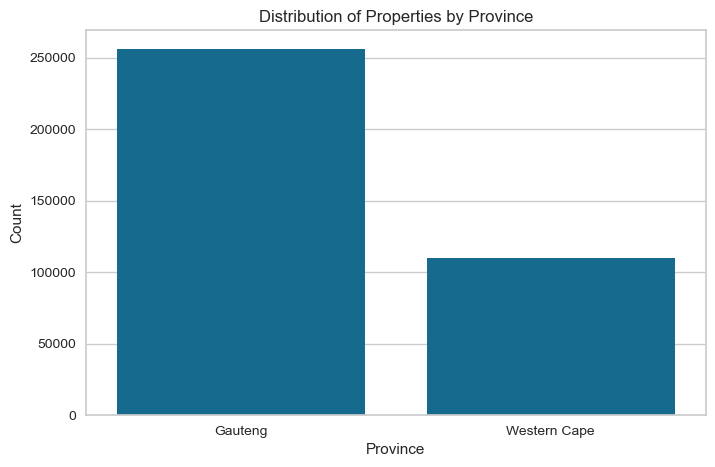

In [22]:
#Province Barplot
plt.figure(figsize=(8, 5))
sns.countplot(x='ProvinceName', data=df)
plt.title('Distribution of Properties by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

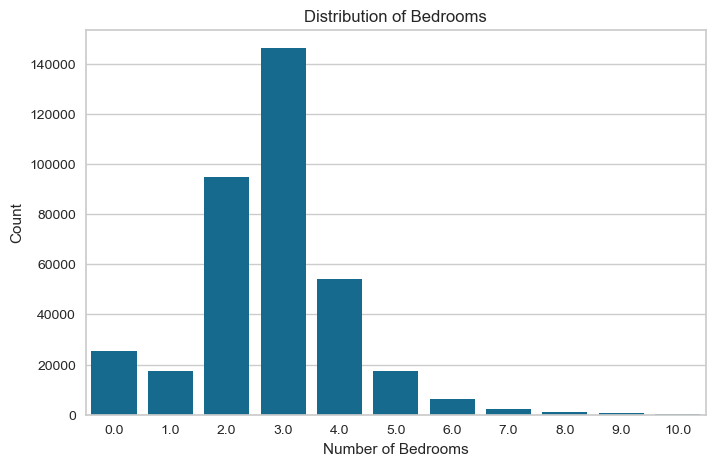

In [23]:
#Bedrooms Barplot
plt.figure(figsize=(8, 5))
sns.countplot(x='Bedrooms', data=df)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

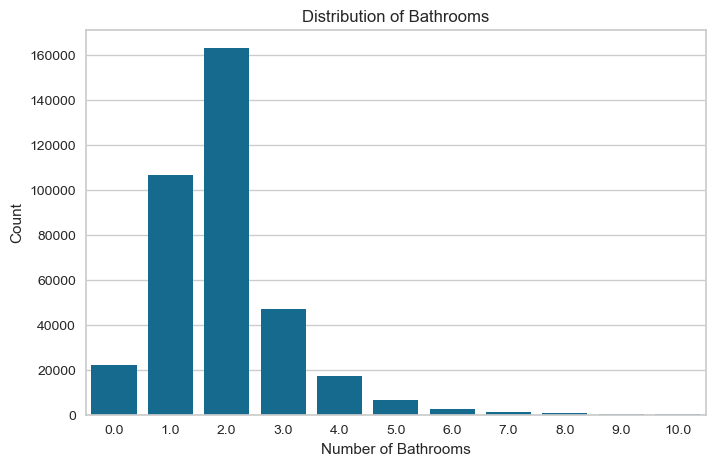

In [24]:
#Bathrooms Barplot
plt.figure(figsize=(8, 5))
sns.countplot(x='Bathrooms', data=df)
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

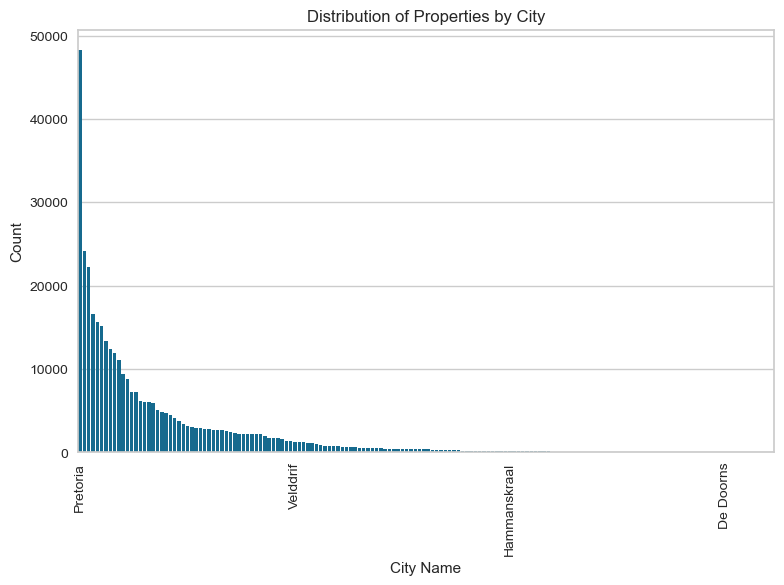

In [25]:
# City Barplot
plt.figure(figsize=(8, 5))
sns.countplot(x='CityName', data=df, order=df['CityName'].value_counts().index)

# Set x-ticks with fewer intervals (e.g., showing every other label)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.tight_layout()
plt.title('Distribution of Properties by City')
plt.xlabel('City Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

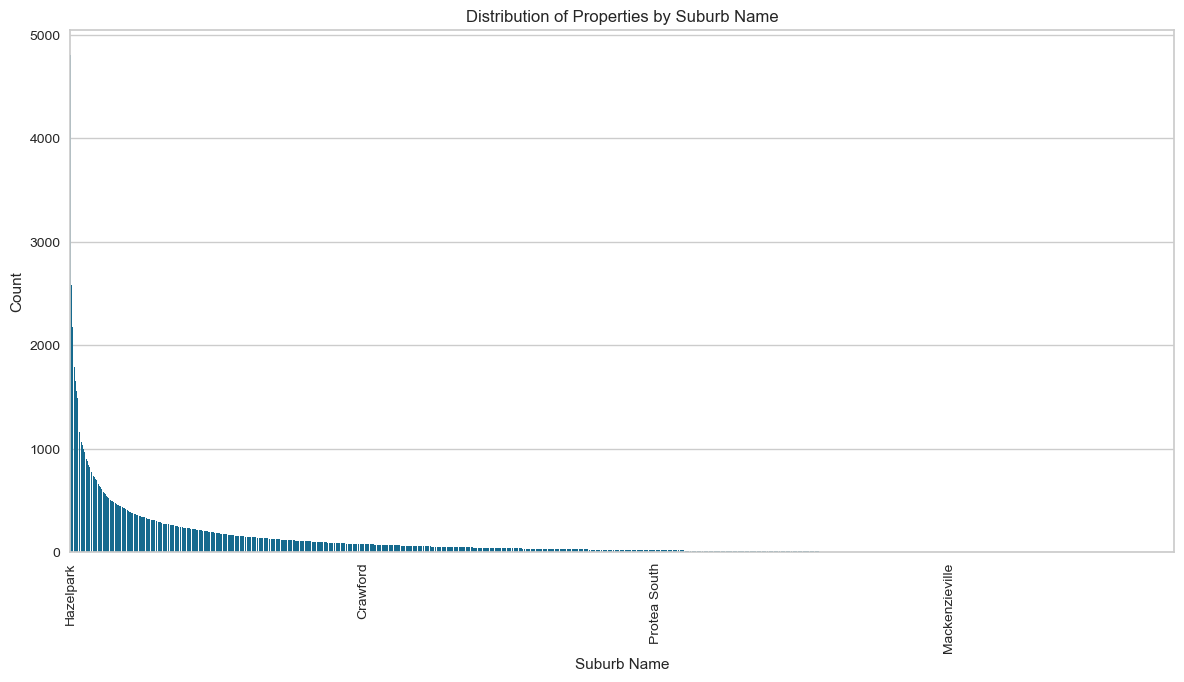

In [26]:
# SuburbName Barplot
plt.figure(figsize=(12, 6))
sns.countplot(x='SuburbName', data=df, order=df['SuburbName'].value_counts().index)

# Set x-ticks with fewer intervals (e.g., showing every other label)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.tight_layout()
plt.title('Distribution of Properties by Suburb Name')
plt.xlabel('Suburb Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

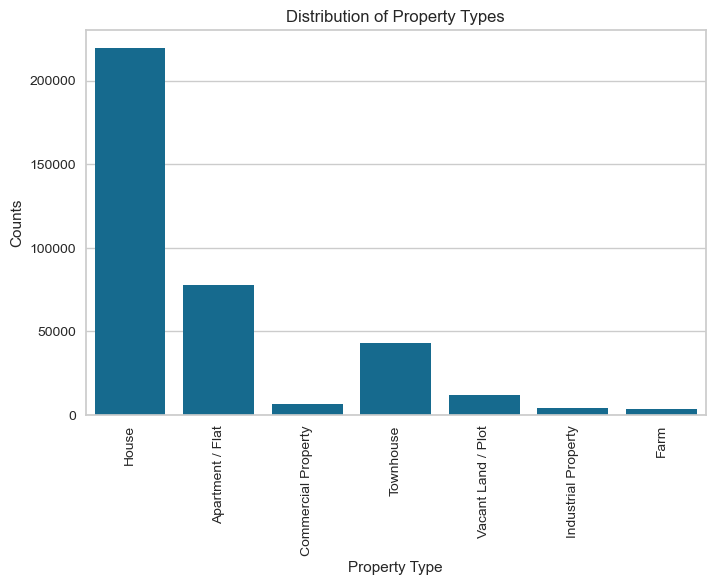

In [27]:
# Histogram for PropertyType
plt.figure(figsize=(8, 5))
sns.countplot(x='PropertyType', data=df)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

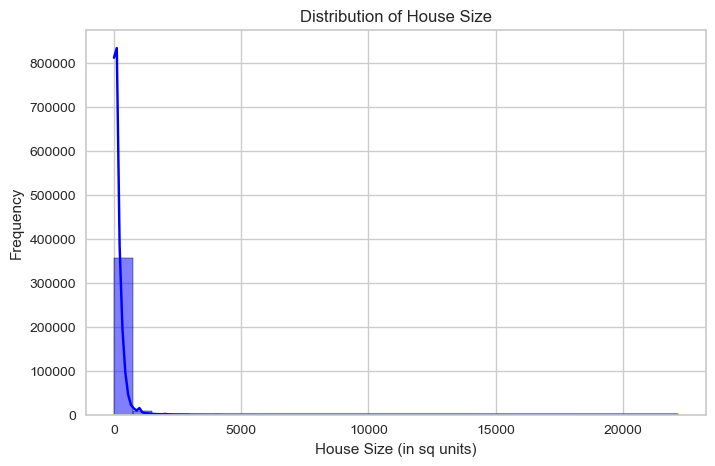

In [28]:
#Histogram for HouseSize
plt.figure(figsize=(8, 5))
sns.histplot(df['HouseSize'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Size')
plt.xlabel('House Size (in sq units)')
plt.ylabel('Frequency')
plt.show()

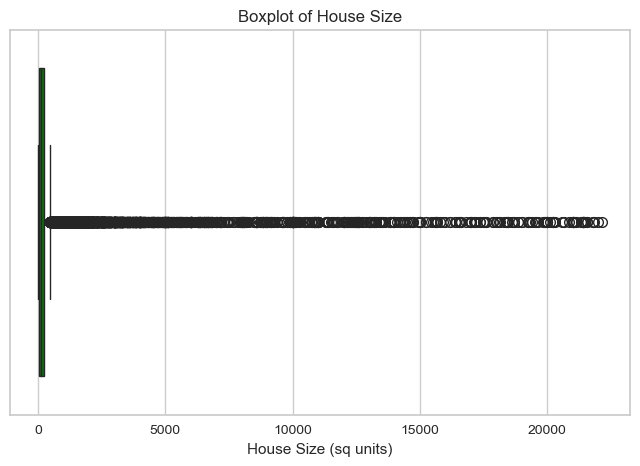

In [29]:
#Boxplot for HouseSize
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['HouseSize'], color='green')
plt.title('Boxplot of House Size')
plt.xlabel('House Size (sq units)')
plt.show()

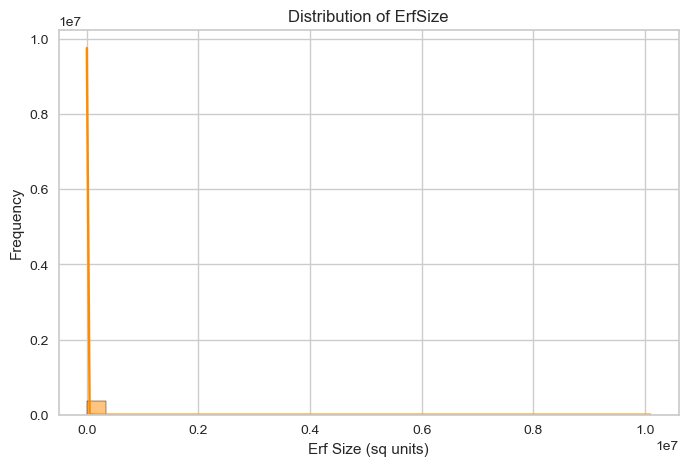

In [30]:
#Histogram for ErfSize
plt.figure(figsize=(8, 5))
sns.histplot(df['ErfSize'], bins=30, kde=True, color='darkorange')
plt.title('Distribution of ErfSize')
plt.xlabel('Erf Size (sq units)')
plt.ylabel('Frequency')
plt.show()

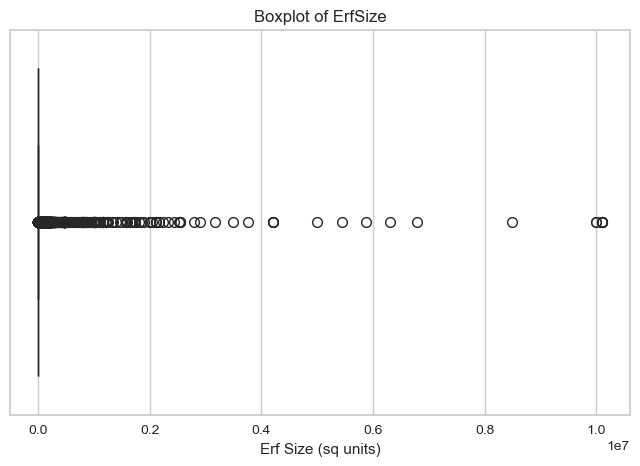

In [31]:
#Boxplot for ErfSize
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['ErfSize'], color='indigo')
plt.title('Boxplot of ErfSize')
plt.xlabel('Erf Size (sq units)')
plt.show()

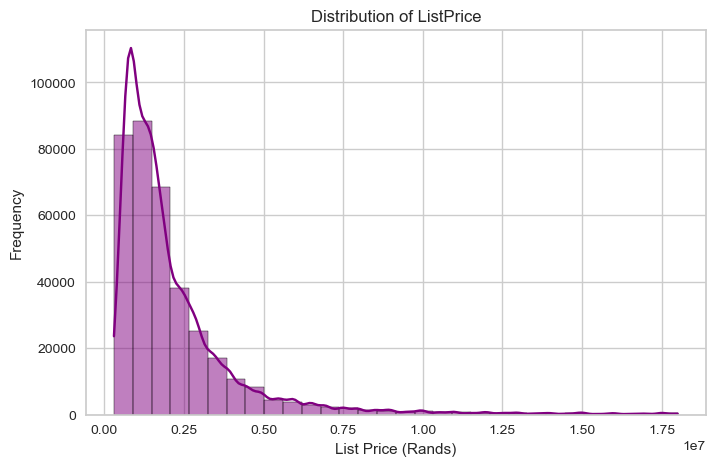

In [32]:
#Histogram for ListPrice
plt.figure(figsize=(8, 5))
sns.histplot(df['ListPrice'], bins=30, kde=True, color='purple')
plt.title('Distribution of ListPrice')
plt.xlabel('List Price (Rands)')
plt.ylabel('Frequency')
plt.show()

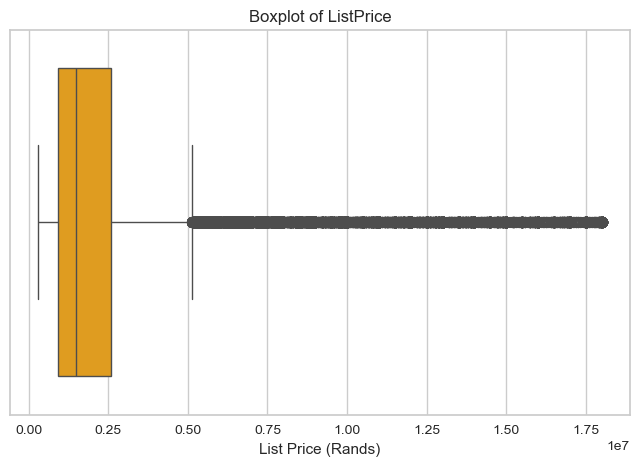

In [33]:
#Boxplot for ListPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['ListPrice'], color='orange')
plt.title('Boxplot of ListPrice')
plt.xlabel('List Price (Rands)')
plt.show()

In [34]:
#Average Listing Price per Province
avg_price_per_province = df.groupby('ProvinceName')['ListPrice'].mean().sort_values()
avg_price_per_province

ProvinceName
Gauteng        1825344.378
Western Cape   3031471.098
Name: ListPrice, dtype: float64

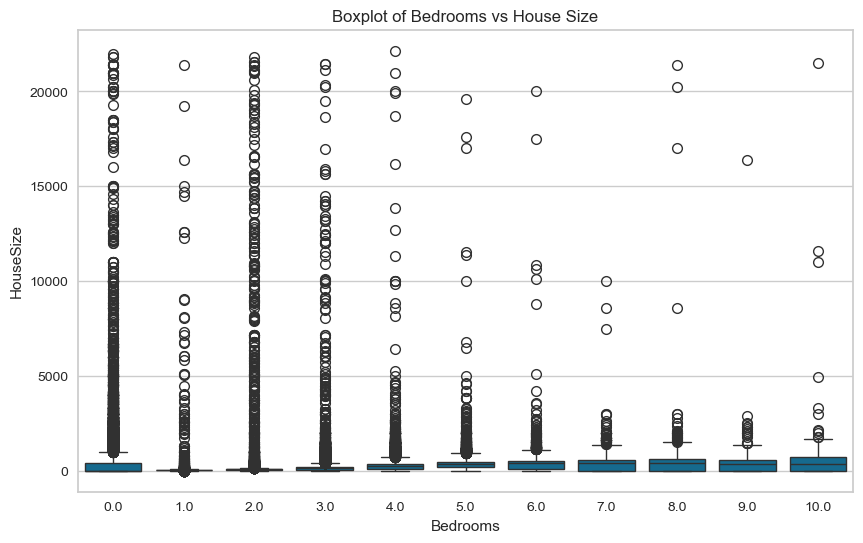

In [35]:
#Boxplot of Bedrooms vs House Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms', y='HouseSize', data=df)
plt.title('Boxplot of Bedrooms vs House Size')
plt.xticks(rotation=0)
plt.show()

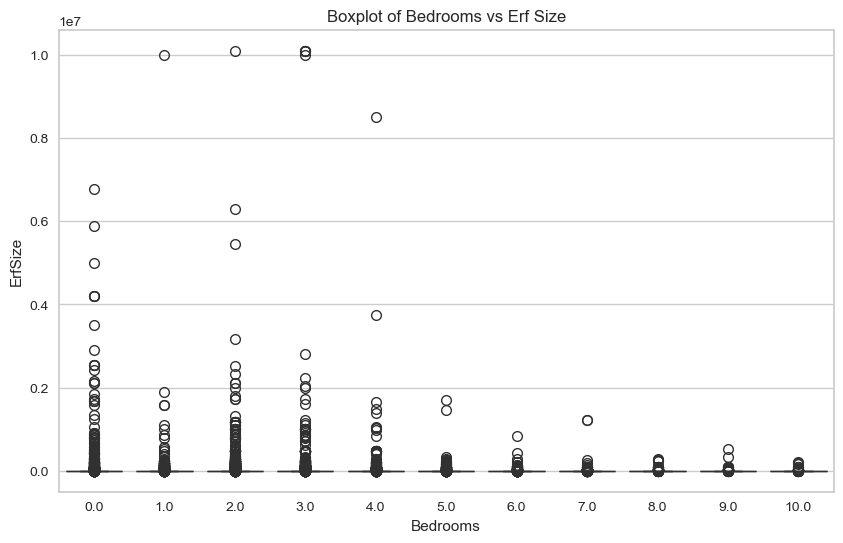

In [36]:
#Boxplot of Bedrooms vs Erf Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms', y='ErfSize', data=df)
plt.title('Boxplot of Bedrooms vs Erf Size')
plt.xticks(rotation=0)
plt.show()

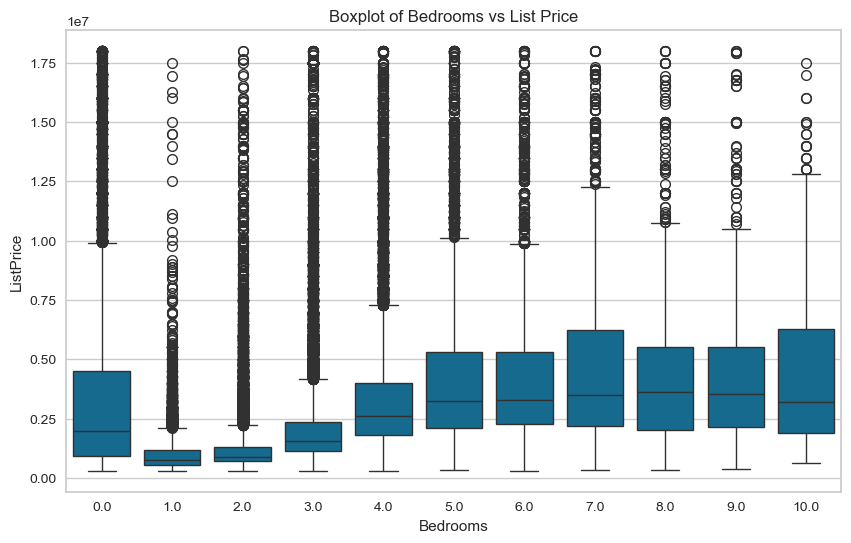

In [37]:
#Boxplot of Bedrooms vs List Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms', y='ListPrice', data=df)
plt.title('Boxplot of Bedrooms vs List Price')
plt.xticks(rotation=0)
plt.show()

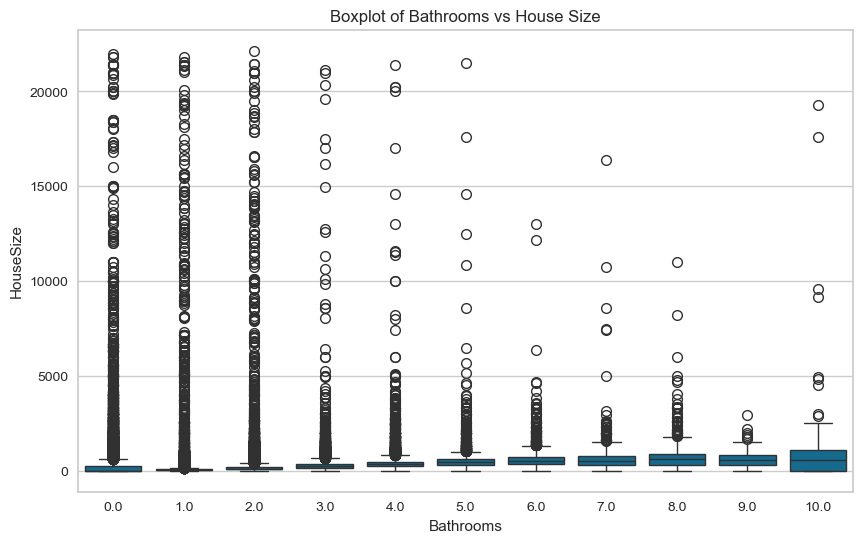

In [38]:
#Boxplot of Bedrooms vs List Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bathrooms', y='HouseSize', data=df)
plt.title('Boxplot of Bathrooms vs House Size')
plt.xticks(rotation=0)
plt.show()

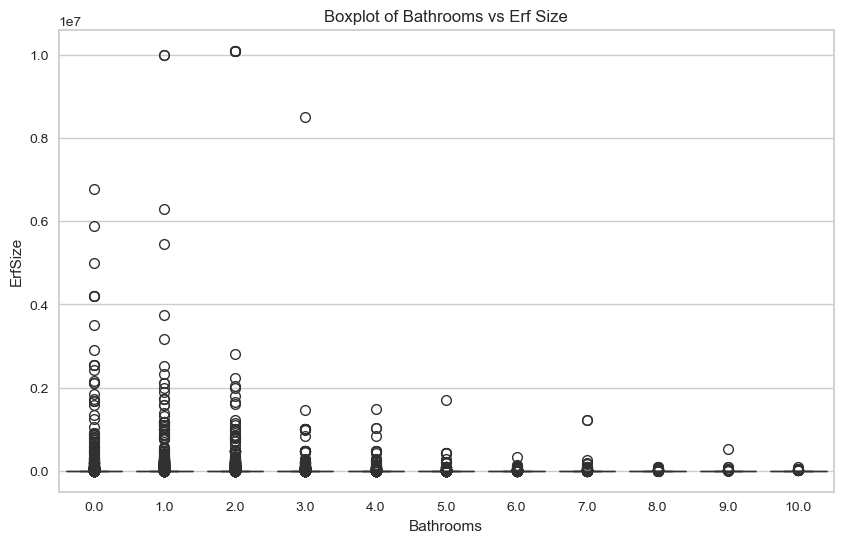

In [39]:
#Boxplot of Bedrooms vs List Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bathrooms', y='ErfSize', data=df)
plt.title('Boxplot of Bathrooms vs Erf Size')
plt.xticks(rotation=0)
plt.show()

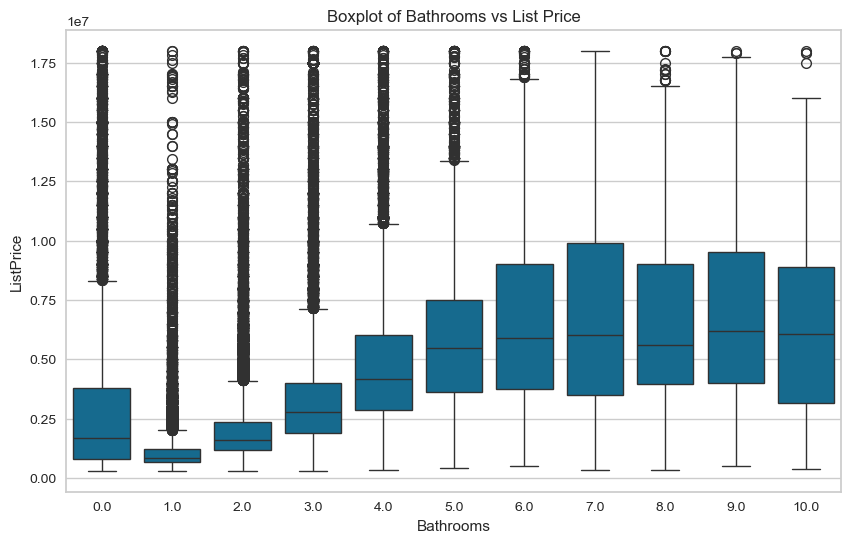

In [40]:
#Boxplot of Bedrooms vs List Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bathrooms', y='ListPrice', data=df)
plt.title('Boxplot of Bathrooms vs List Price')
plt.xticks(rotation=0)
plt.show()

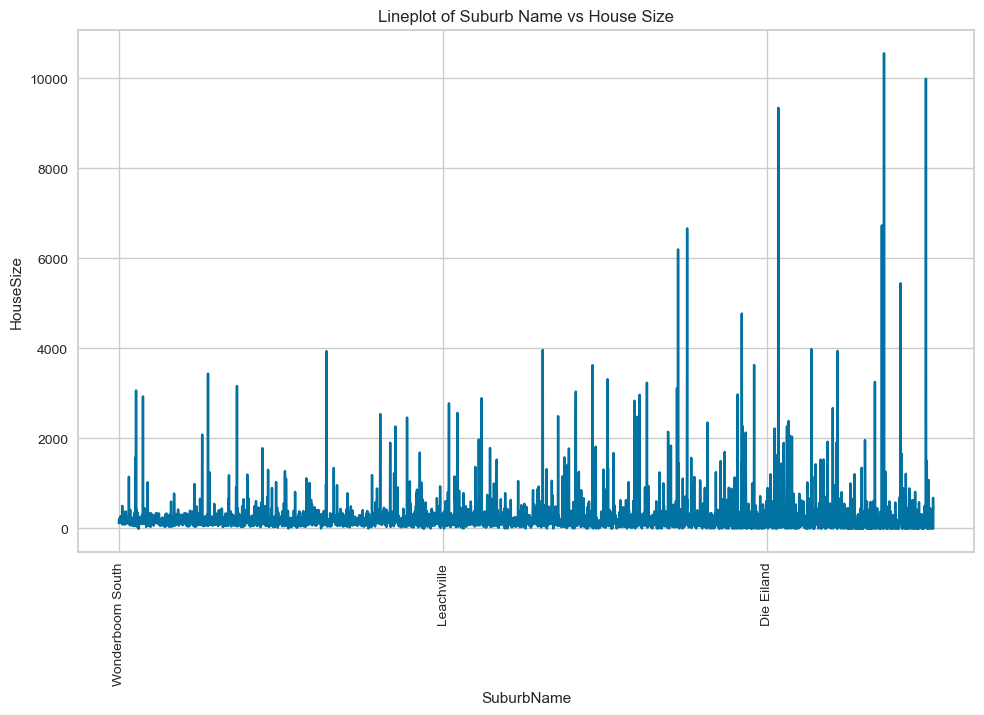

In [41]:
#Lineplot of Suburb Name vs House Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='SuburbName', y='HouseSize', data=df, errorbar=None)

# Set x-ticks with fewer intervals (e.g., showing every other label)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.tight_layout()
plt.title('Lineplot of Suburb Name vs House Size')
plt.xticks(rotation=90)
plt.show()

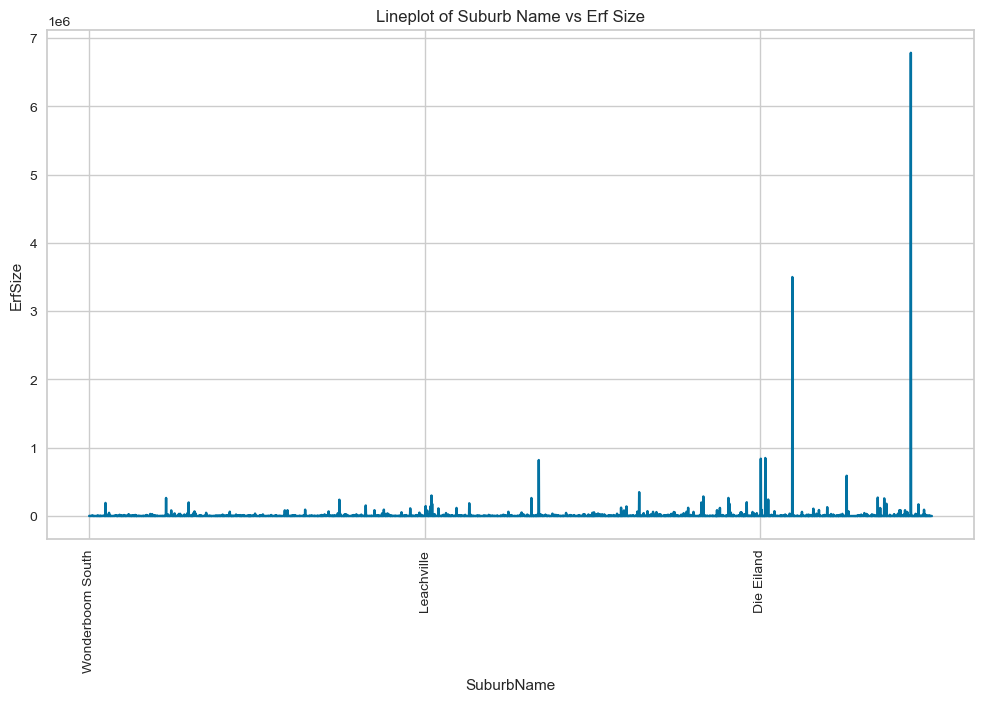

In [42]:
#Lineplot of Suburb Name vs Erf Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='SuburbName', y='ErfSize', data=df, errorbar=None)

# Set x-ticks with fewer intervals (e.g., showing every other label)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.tight_layout()
plt.title('Lineplot of Suburb Name vs Erf Size')
plt.xticks(rotation=90)
plt.show()

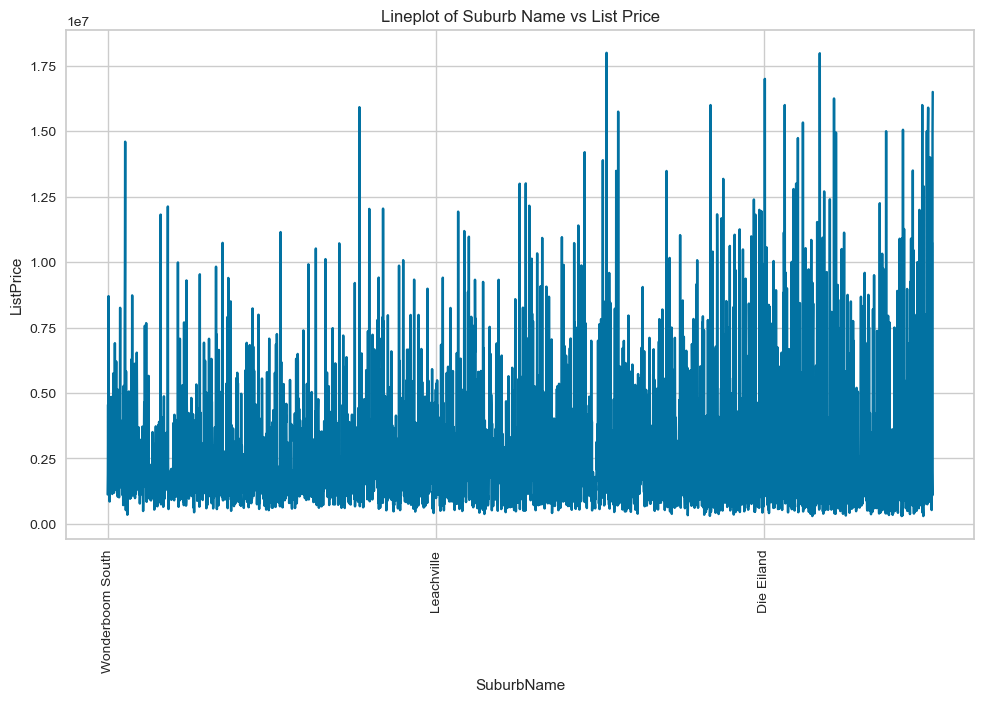

In [43]:
#Lineplot of Suburb Name vs List Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='SuburbName', y='ListPrice', data=df, errorbar=None)

# Set x-ticks with fewer intervals (e.g., showing every other label)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.tight_layout()
plt.title('Lineplot of Suburb Name vs List Price')
plt.xticks(rotation=90)
plt.show()

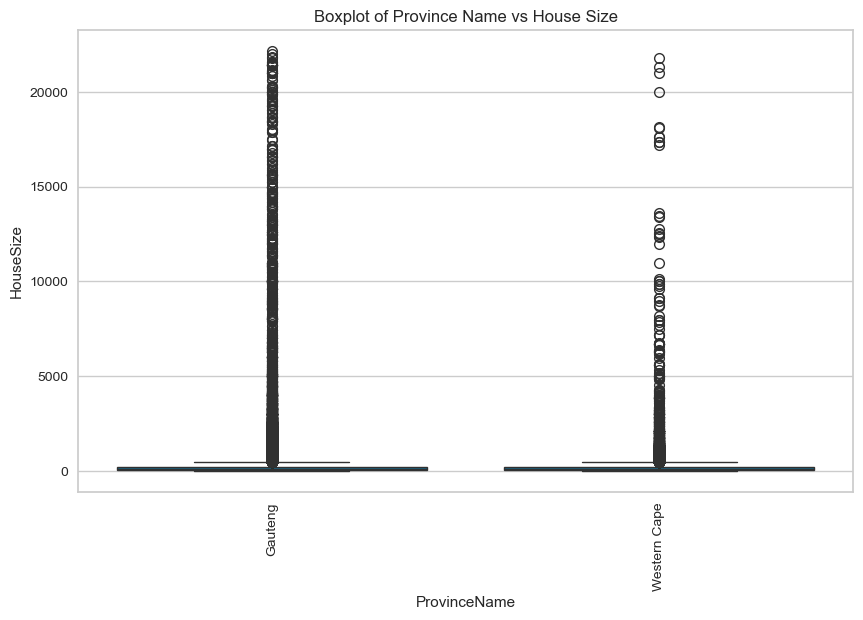

In [44]:
#Boxplot of Province Name vs House Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProvinceName', y='HouseSize', data=df)
plt.title('Boxplot of Province Name vs House Size')
plt.xticks(rotation=90)
plt.show()

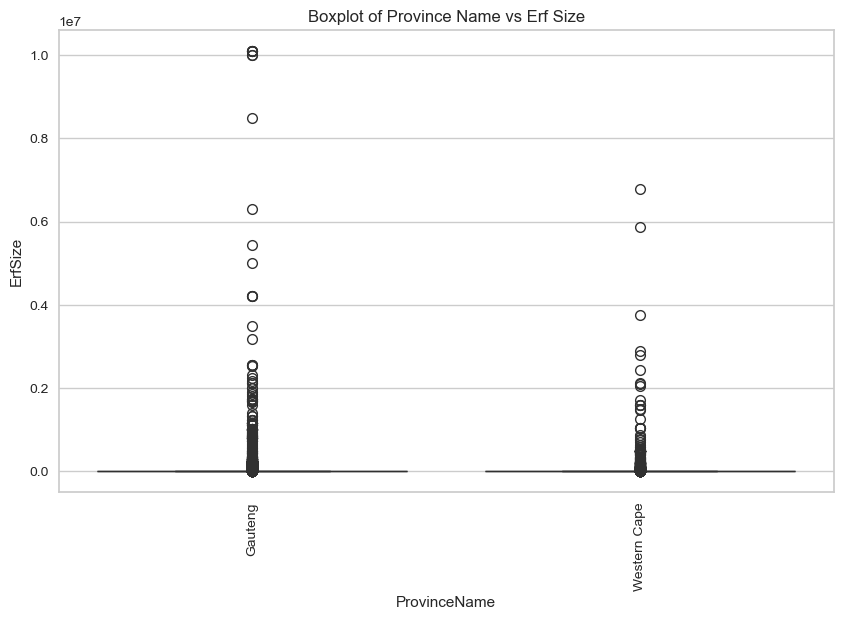

In [45]:
#Boxplot of Province Name vs Erf Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProvinceName', y='ErfSize', data=df)
plt.title('Boxplot of Province Name vs Erf Size')
plt.xticks(rotation=90)
plt.show()

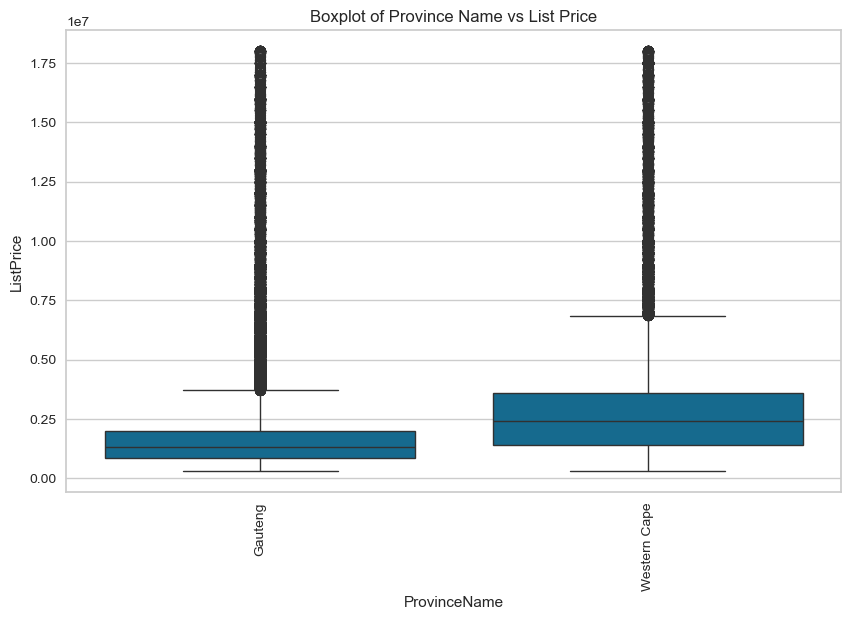

In [46]:
#Boxplot of Province Name Name vs List Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProvinceName', y='ListPrice', data=df)
plt.title('Boxplot of Province Name vs List Price')
plt.xticks(rotation=90)
plt.show()

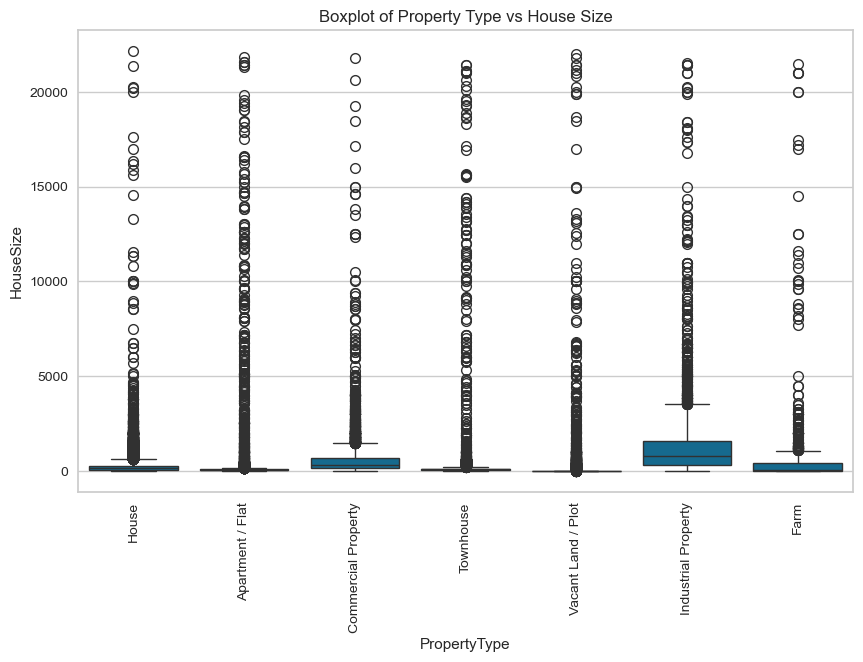

In [47]:
#Boxplot of Property Type vs House Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='PropertyType', y='HouseSize', data=df)
plt.title('Boxplot of Property Type vs House Size')
plt.xticks(rotation=90)
plt.show()

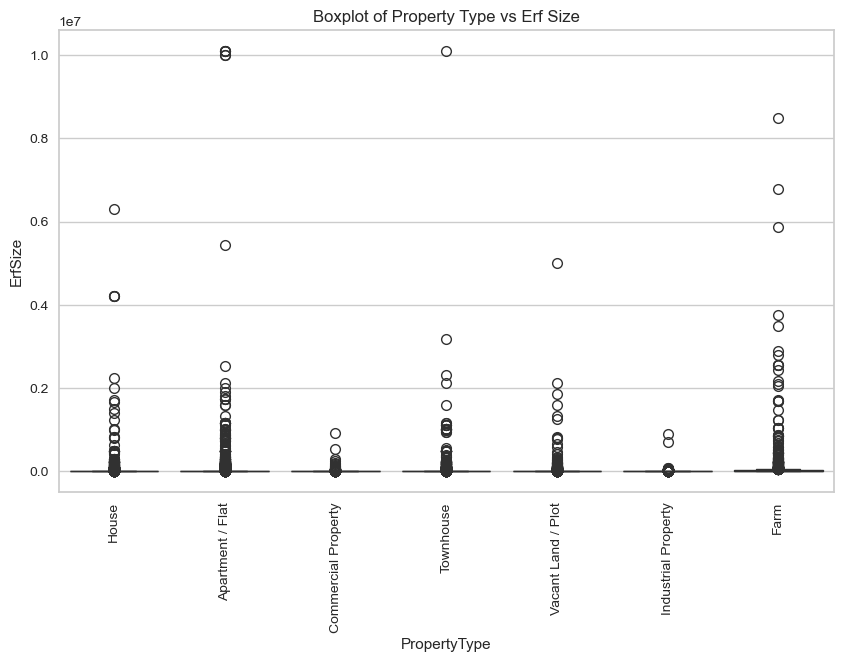

In [48]:
#Boxplot of Property Type vs Erf Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='PropertyType', y='ErfSize', data=df)
plt.title('Boxplot of Property Type vs Erf Size')
plt.xticks(rotation=90)
plt.show()

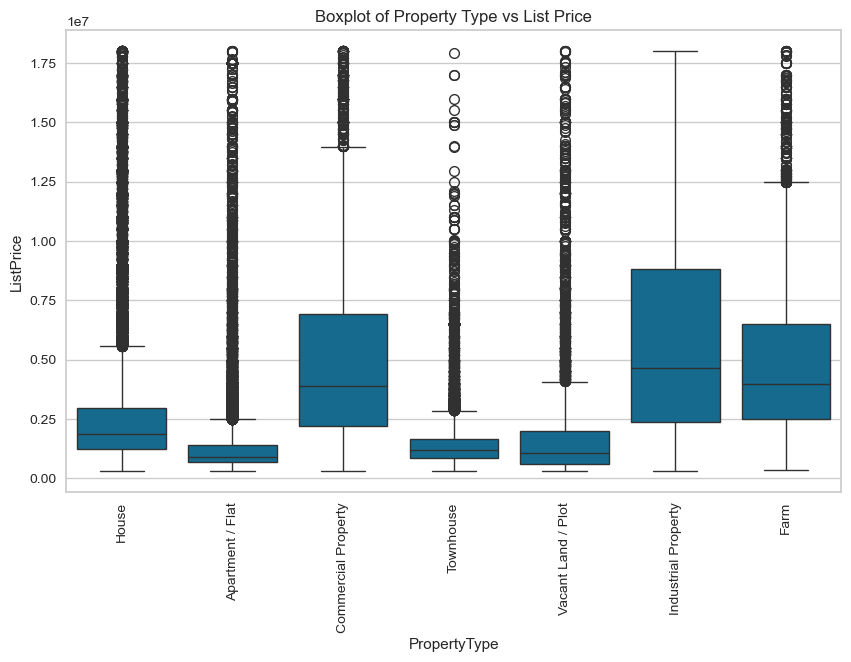

In [49]:
#Boxplot of Property Type vs List Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='PropertyType', y='ListPrice', data=df)
plt.title('Boxplot of Property Type vs List Price')
plt.xticks(rotation=90)
plt.show()

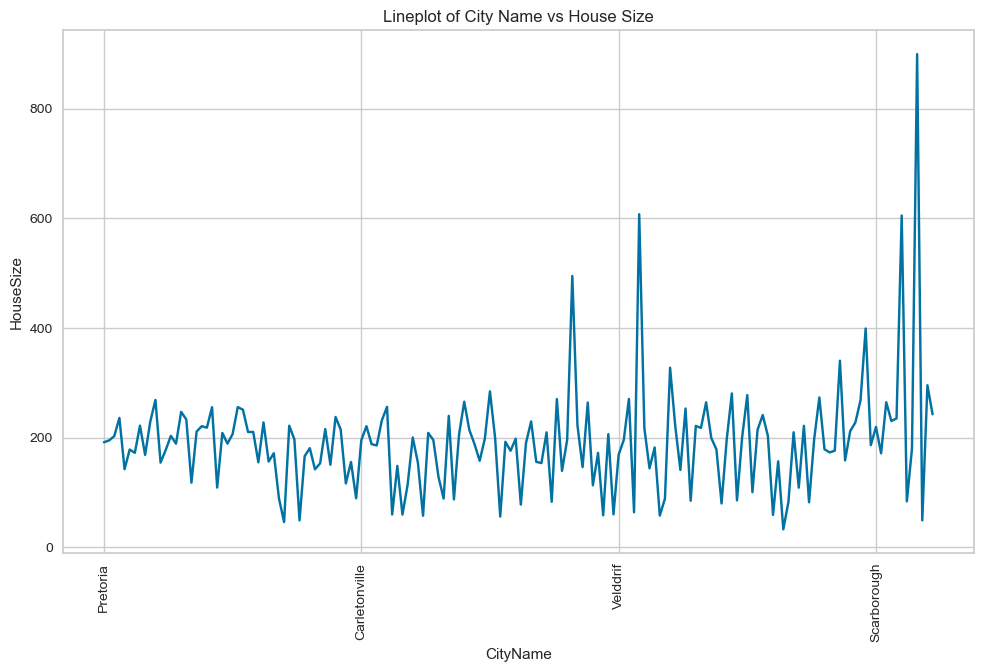

In [50]:
#Lineplot of City Name vs House Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='CityName', y='HouseSize', data=df, errorbar=None)

# Set x-ticks with fewer intervals
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.tight_layout()
plt.title('Lineplot of City Name vs House Size')
plt.xticks(rotation=90)
plt.show()

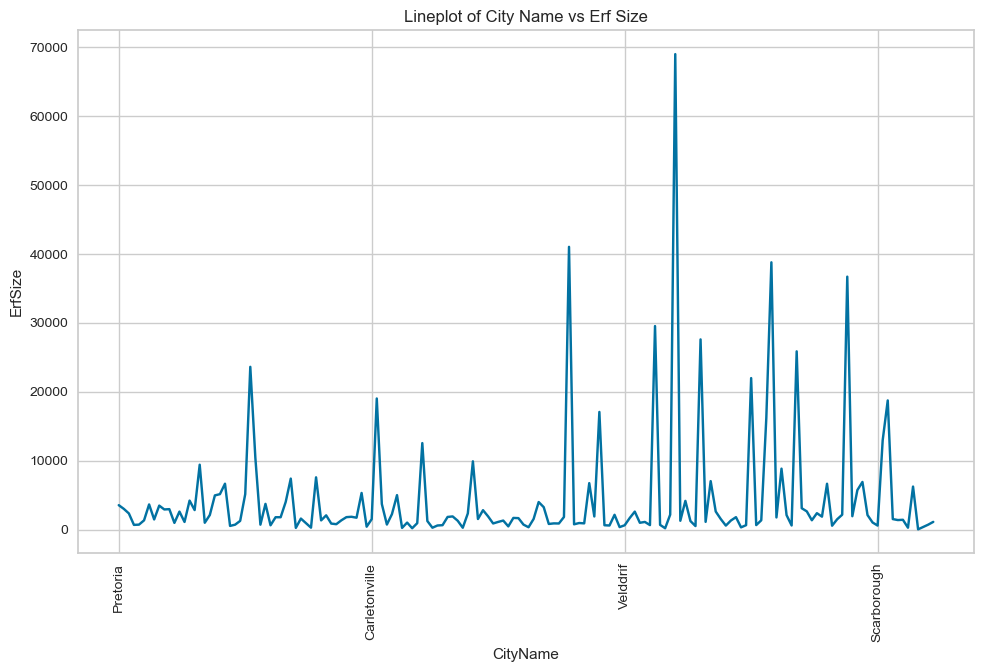

In [51]:
#Lineplot of City Name vs Erf Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='CityName', y='ErfSize', data=df, errorbar=None)

# Set x-ticks with fewer intervals
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.tight_layout()
plt.title('Lineplot of City Name vs Erf Size')
plt.xticks(rotation=90)
plt.show()

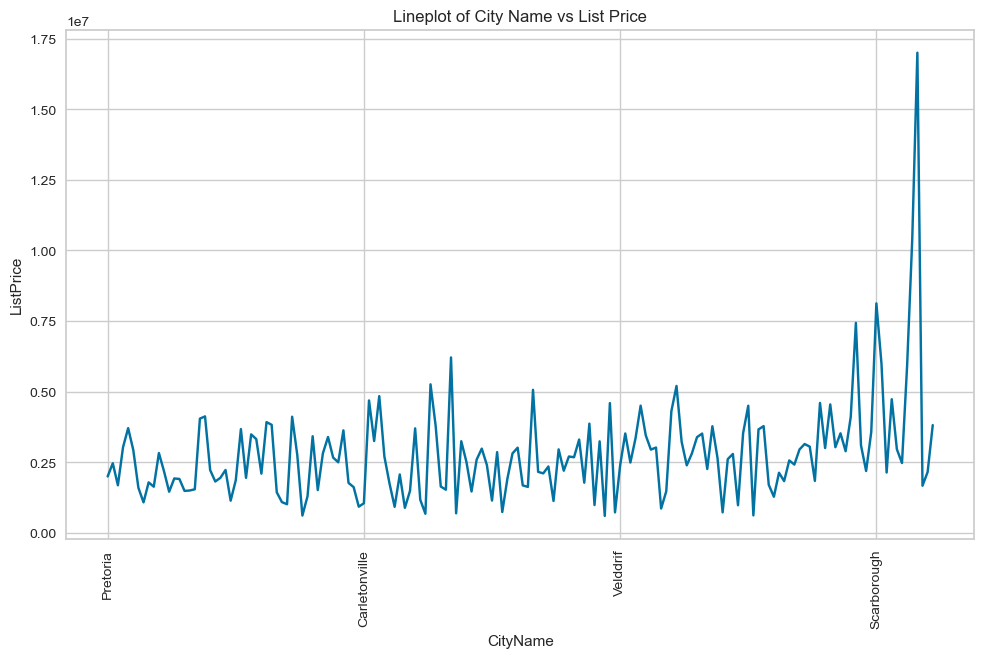

In [52]:
#Lineplot of City Name vs House Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='CityName', y='ListPrice', data=df, errorbar=None)

# Set x-ticks with fewer intervals
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.tight_layout()
plt.title('Lineplot of City Name vs List Price')
plt.xticks(rotation=90)
plt.show()

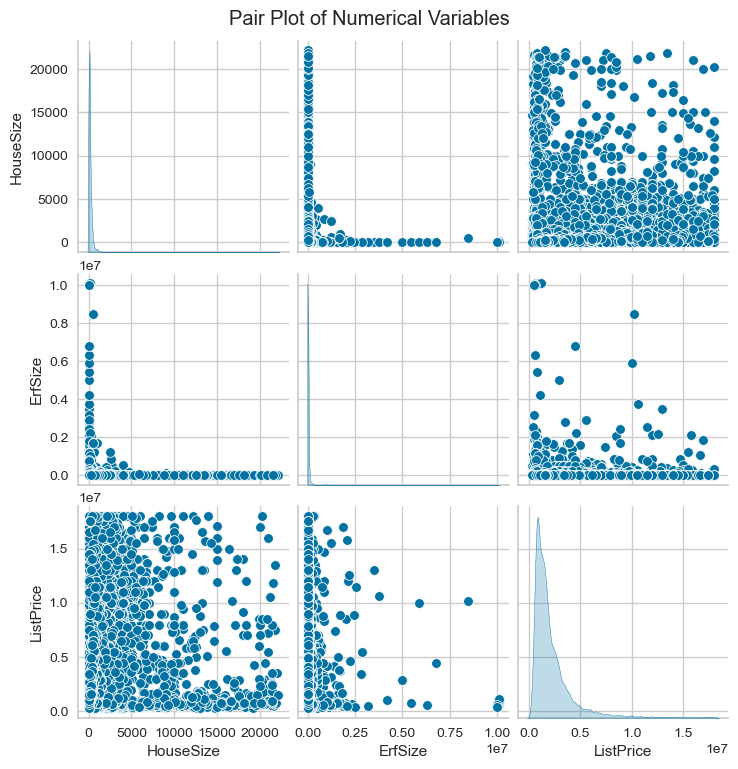

In [53]:
#Pairplot for Numerical Variables
# Defining the numerical columns you want to include in the pair plot
numerical_cols = ['HouseSize', 'ErfSize', 'ListPrice']
sns.pairplot(df[numerical_cols], diag_kind='kde')

# Show the plot
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# **Correlation Analysis**

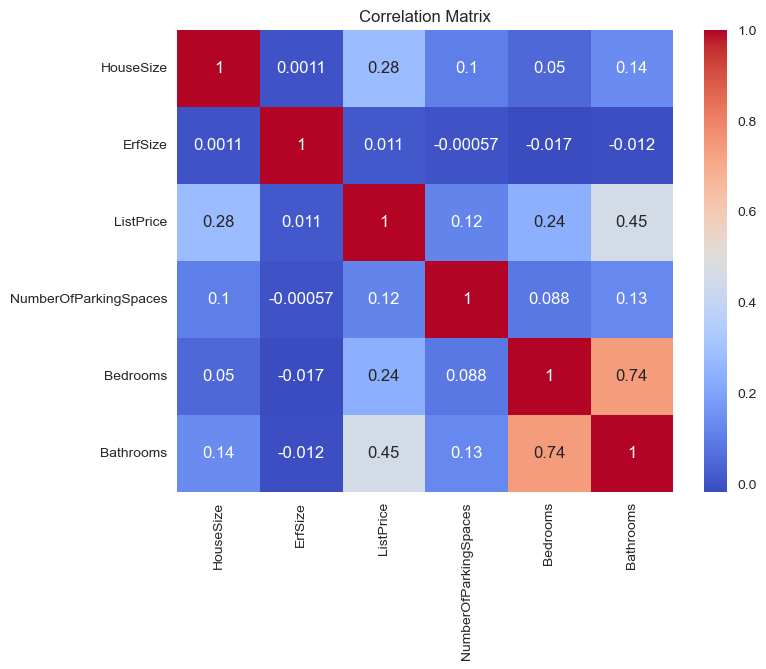

In [55]:
# Select numerical columns for correlation matrix
numerical_cols = ['HouseSize', 'ErfSize', 'ListPrice', 'NumberOfParkingSpaces', 'Bedrooms', 'Bathrooms']

# Generate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [56]:
# Save the cleaned dataset to a new excel file
cleaned_file_path = 'df.xlsx'
df.to_excel(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to df.xlsx


## ***K-Means Clustering***

In [58]:
# Select only the 'ErfSize', 'HouseSize', and 'ListPrice' columns
subset_df = df[['HouseSize', 'ErfSize', 'ListPrice', 'NumberOfParkingSpaces', 'Bedrooms', 'Bathrooms']]
subset_df

,HouseSize,ErfSize,ListPrice,NumberOfParkingSpaces,Bedrooms,Bathrooms
0,186.000,700.000,1490000.000,1.000,3.000,3.000
1,186.000,700.000,1490000.000,2.000,3.000,1.000
2,186.000,499.000,1490000.000,2.000,3.000,2.000
4,80.000,0.000,1370000.000,2.000,2.000,2.000
5,0.000,2682.000,15000000.000,0.000,0.000,0.000
...,...,...,...,...,...,...
986369,0.000,0.000,1150000.000,1.000,3.000,2.000
986370,80.000,0.000,1050000.000,1.000,2.000,1.000
986372,0.000,1425.000,1500000.000,3.000,3.000,1.000
986377,0.000,1425.000,1500000.000,3.000,3.000,1.000


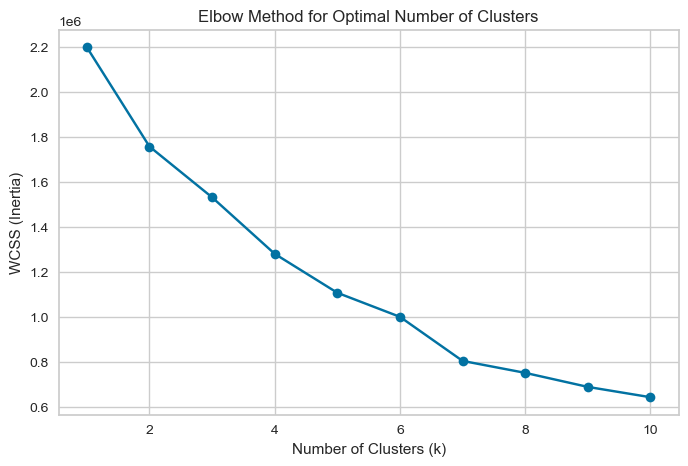

In [59]:
# Selecting the numerical columns: 'ErfSize', 'HouseSize', 'ListPrice'
numerical_colss = ['HouseSize', 'ErfSize', 'ListPrice', 'NumberOfParkingSpaces', 'Bedrooms', 'Bathrooms']
df_numerical = df[numerical_colss]

# Scaling the data (StandardScaler is used to normalize the data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives the sum of squared distances

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [60]:
# Features for K-Means clustering
X = subset_df[['HouseSize', 'ErfSize', 'ListPrice', 'NumberOfParkingSpaces', 'Bedrooms', 'Bathrooms']]

# Create KMeans model with k=5
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
subset_df['Cluster'] = kmeans.labels_

# View the DataFrame with cluster assignments
subset_df

C:\Users\mzogu\AppData\Local\Temp\ipykernel_4720\1285048246.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Cluster'] = kmeans.labels_


,HouseSize,ErfSize,ListPrice,NumberOfParkingSpaces,Bedrooms,Bathrooms,Cluster
0,186.000,700.000,1490000.000,1.000,3.000,3.000,2
1,186.000,700.000,1490000.000,2.000,3.000,1.000,2
2,186.000,499.000,1490000.000,2.000,3.000,2.000,2
4,80.000,0.000,1370000.000,2.000,2.000,2.000,2
5,0.000,2682.000,15000000.000,0.000,0.000,0.000,1
...,...,...,...,...,...,...,...
986369,0.000,0.000,1150000.000,1.000,3.000,2.000,2
986370,80.000,0.000,1050000.000,1.000,2.000,1.000,2
986372,0.000,1425.000,1500000.000,3.000,3.000,1.000,2
986377,0.000,1425.000,1500000.000,3.000,3.000,1.000,2


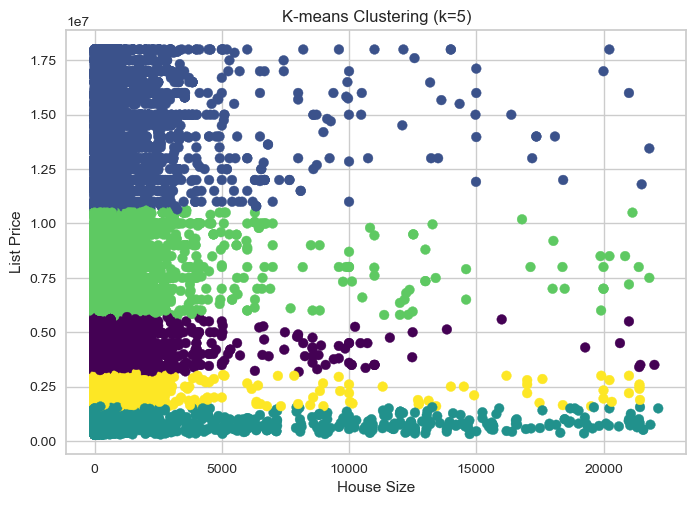

In [61]:
# Plot the clusters (using two features for visualization)
plt.scatter(subset_df['HouseSize'], subset_df['ListPrice'], c=subset_df['Cluster'], cmap='viridis')
plt.xlabel('House Size')
plt.ylabel('List Price')
plt.title('K-means Clustering (k=5)')
plt.show()

## *Cluster Profiling*

In [63]:
# adding kmeans cluster labels to the original dataframe
subset_df["K_means_segments"] = kmeans.labels_

C:\Users\mzogu\AppData\Local\Temp\ipykernel_4720\2938582827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["K_means_segments"] = kmeans.labels_


In [64]:
cluster_profile = subset_df.groupby("K_means_segments").mean()

In [65]:
cluster_profile["count_in_each_segment"] = (
subset_df.groupby("K_means_segments")["ListPrice"].count().values)

In [66]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,HouseSize,ErfSize,ListPrice,NumberOfParkingSpaces,Bedrooms,Bathrooms,Cluster,count_in_each_segment
K_means_segments,,,,,,,,
0,310.599147,2938.556381,4054615.968975,2.226441,3.473840,2.749989,0.000000,44802
1,955.876986,10131.280987,13875502.172930,4.627220,2.959245,3.244719,1.000000,5349
2,100.376828,3585.280575,976787.888985,1.459515,2.358946,1.439028,2.000000,190416
3,562.977572,5436.128772,7420854.353493,2.864739,3.550936,3.321426,3.000000,15873
4,193.026536,1681.877445,2201162.560001,2.009690,3.135777,2.155875,4.000000,110114


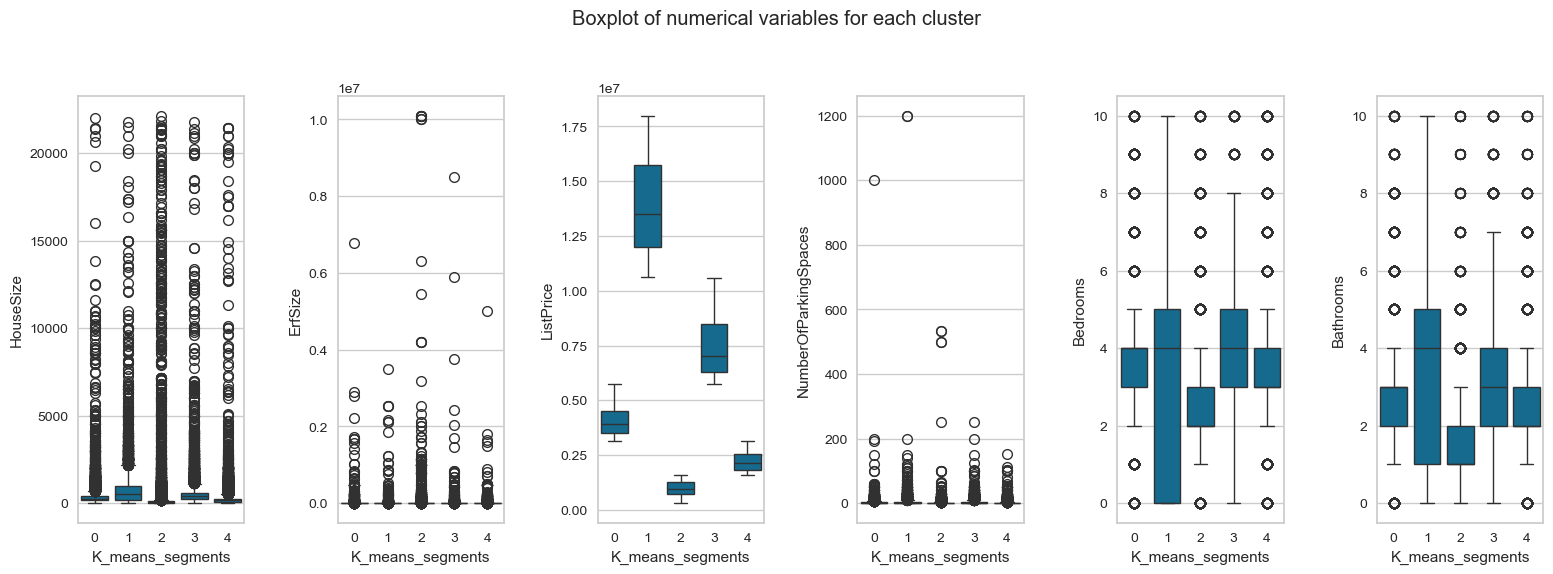

In [67]:
fig, axes = plt.subplots(1, 6, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(6):
    sns.boxplot(ax=axes[ii], y=subset_df[numerical_colss[counter]], x=subset_df["K_means_segments"])
    counter = counter + 1
fig.tight_layout(pad=2.0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

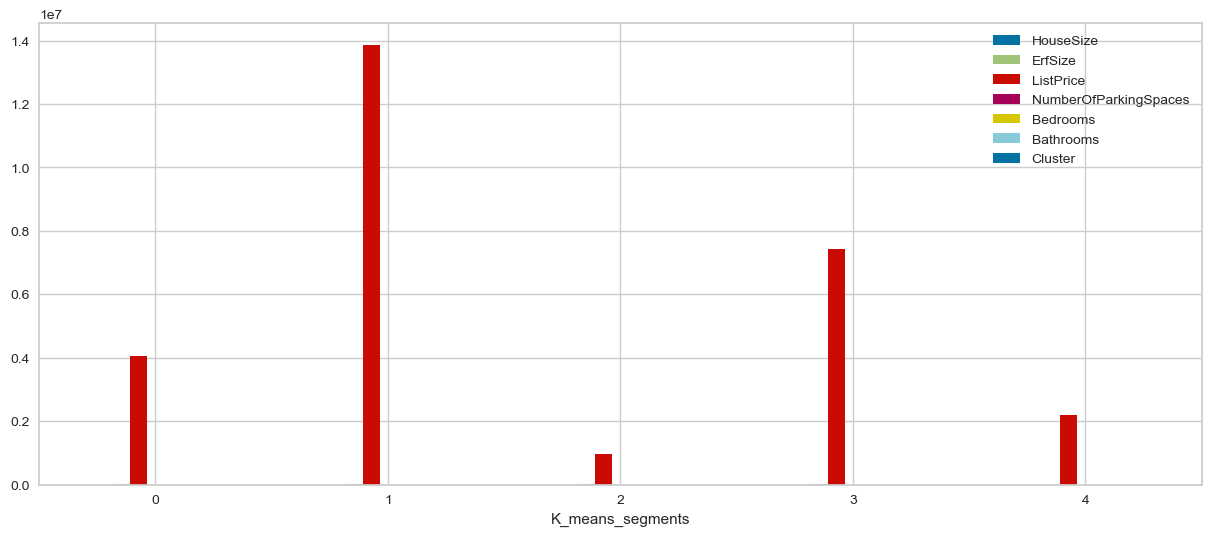

In [68]:
subset_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)

In [69]:
#install surprise library
!pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable


# **Collaborative Filtering**

In [71]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [72]:
# Using 'SuburbId' as the user, 'PropertyType' as the item, and 'ListPrice' as the rating.
df = df[['SuburbId', 'PropertyType', 'ListPrice']]

In [73]:
# Converting ListPrice to float
df['ListPrice'] = df['ListPrice'].astype(float)

C:\Users\mzogu\AppData\Local\Temp\ipykernel_4720\2294815430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ListPrice'] = df['ListPrice'].astype(float)


In [74]:
# Defining a Reader object with a suitable rating scale (assuming ListPrice can be treated as a rating)
reader = Reader(rating_scale=(df['ListPrice'].min(), df['ListPrice'].max()))

In [75]:
# Loading the dataset into Surprise format
data = Dataset.load_from_df(df[['SuburbId', 'PropertyType', 'ListPrice']], reader)

In [76]:
# Splitting the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

In [77]:
# Creating the SVD model (Matrix Factorization)
model = SVD()

In [78]:
# Train the model on the training set
model.fit(trainset)

In [79]:
# Making predictions on the test set
predictions = model.test(testset)

In [80]:
# Evaluating the model performance (Root Mean Square Error)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.4f}")

RMSE: 15965585.8960
RMSE: 15965585.8960


In [81]:
# Function to get top N recommendations for a specific user (SuburbId)
def get_top_n_recommendations(predictions, n=5):
    # First map the predictions to each user.
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    
    # Sort the predictions for each user and retrieve the top N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# Get top 5 recommendations for each user (SuburbId)
top_n_recommendations = get_top_n_recommendations(predictions, n=5)

# Printing recommendations
for user, recommendations in top_n_recommendations.items():
    print(f"SuburbId {user} recommendations:")
    for property_type, predicted_rating in recommendations:
        print(f"  PropertyType: {property_type}, Predicted ListPrice: {predicted_rating:.2f}")

SuburbId 8653 recommendations:
  PropertyType: House, Predicted ListPrice: 18000000.00
  PropertyType: Commercial Property, Predicted ListPrice: 18000000.00
  PropertyType: Townhouse, Predicted ListPrice: 18000000.00
  PropertyType: Apartment / Flat, Predicted ListPrice: 18000000.00
  PropertyType: House, Predicted ListPrice: 18000000.00
SuburbId 5282 recommendations:
  PropertyType: Vacant Land / Plot, Predicted ListPrice: 18000000.00
  PropertyType: House, Predicted ListPrice: 18000000.00
  PropertyType: House, Predicted ListPrice: 18000000.00
  PropertyType: Vacant Land / Plot, Predicted ListPrice: 18000000.00
  PropertyType: House, Predicted ListPrice: 18000000.00
SuburbId 266 recommendations:
  PropertyType: Apartment / Flat, Predicted ListPrice: 18000000.00
  PropertyType: House, Predicted ListPrice: 18000000.00
  PropertyType: House, Predicted ListPrice: 18000000.00
  PropertyType: Townhouse, Predicted ListPrice: 18000000.00
  PropertyType: Apartment / Flat, Predicted ListPrice: